In [2]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
swift = pd.read_pickle('swift.pkl')
maxwell = pd.read_pickle('maxwell.pkl')

In [4]:
swift = swift[['text']].copy()
maxwell = maxwell[['text']].copy()

## Sentiment Analysis with TextBlob

In [5]:
def get_sentiment(x):
    '''using TextBlob, get the sentiment score for a given body of text'''
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [6]:
# Apply the Polarity Scoring from TextBlob
swift['blob'] = swift['text'].apply(lambda x: get_sentiment(x))
swift.head()

,text,blob
0,"RT @TSwiftFTC: 🥇 According to @HITSDD, Taylor ...",1.000000
1,RT @taylorr_media: Taylor Swift - All Too Well...,0.000000
2,Taylor swift and ed sheeran music mainly. And ...,0.166667
3,RT @soitfuckingoes: taylor swift didn't write:...,0.200000
4,"Suporte list: Nial Horan, Demi Lovato, Taylor ...",0.000000


In [7]:
# Apply the Polarity Scoring from TextBlob
maxwell['blob'] = maxwell['text'].apply(lambda x: get_sentiment(x))
swift.head()

,text,blob
0,"RT @TSwiftFTC: 🥇 According to @HITSDD, Taylor ...",1.000000
1,RT @taylorr_media: Taylor Swift - All Too Well...,0.000000
2,Taylor swift and ed sheeran music mainly. And ...,0.166667
3,RT @soitfuckingoes: taylor swift didn't write:...,0.200000
4,"Suporte list: Nial Horan, Demi Lovato, Taylor ...",0.000000


## Sentiment Analysis with Vader

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
swift['vader'] = swift['text'].apply(lambda x: sid.polarity_scores(x))
# Create a few extra columns to aid in the analysis
swift['compound'] = swift['vader'].apply(lambda score_dict: score_dict['compound'])
swift.head()

,text,blob,vader,compound
0,"RT @TSwiftFTC: 🥇 According to @HITSDD, Taylor ...",1.000000,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.7184
1,RT @taylorr_media: Taylor Swift - All Too Well...,0.000000,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.4404
2,Taylor swift and ed sheeran music mainly. And ...,0.166667,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.2023
3,RT @soitfuckingoes: taylor swift didn't write:...,0.200000,"{'neg': 0.176, 'neu': 0.719, 'pos': 0.105, 'co...",-0.1994
4,"Suporte list: Nial Horan, Demi Lovato, Taylor ...",0.000000,"{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'comp...",0.2023


In [10]:
swift['vader'][0]

{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.7184}

In [11]:
# Get rid of neutral sentiment
filter = (swift['compound'] != 0) & (swift['blob'] != 0)
swift = swift[filter]

In [12]:
maxwell['vader'] = maxwell['text'].apply(lambda x: sid.polarity_scores(x))
# Create a few extra columns to aid in the analysis
maxwell['compound'] = maxwell['vader'].apply(lambda score_dict: score_dict['compound'])
maxwell.head()

,text,blob,vader,compound
0,RT @NewsForAIl: 🚨🚨 | BREAKING: U.S. JURY FINDS...,0.0000,"{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compou...",-0.8579
1,RT @KlasfeldReports: A jury has found Ghislain...,-0.3125,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'comp...",-0.8807
2,RT @AFP: #BREAKING British socialite Ghislaine...,-0.2500,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",-0.4215
3,RT @joncoopertweets: BREAKING: GHISLAINE MAXWE...,-0.5000,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...",-0.7481
4,RT @briantylercohen: BREAKING: Ghislaine Maxwe...,-0.5000,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",-0.5473


## Plotting Sentiment

In [13]:
# Get rid of neutral sentiment
filter = (maxwell['compound'] != 0) & (maxwell['blob'] != 0)
maxwell = maxwell[filter]

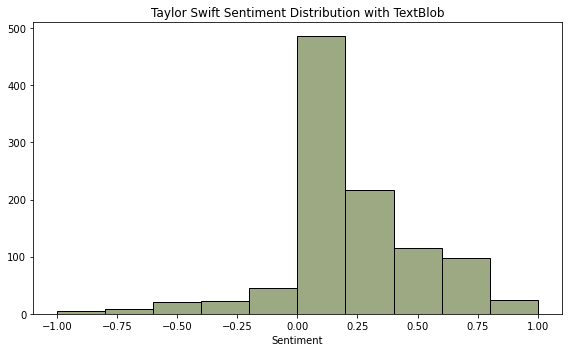

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(swift, x='blob', color="#7C8C58", bins=10)
plt.title("Taylor Swift Sentiment Distribution with TextBlob")
plt.xlabel("Sentiment")
plt.ylabel("")
plt.tight_layout()
plt.savefig("sentiment_swift_blob.png", dpi=300)

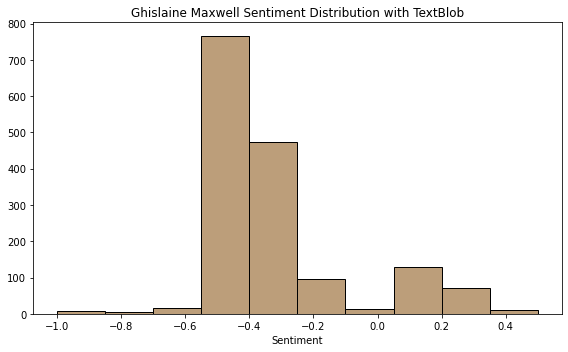

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(maxwell, x='blob', color="#A67E4E", bins=10)
plt.title("Ghislaine Maxwell Sentiment Distribution with TextBlob")
plt.xlabel("Sentiment")
plt.ylabel("")
plt.tight_layout()
plt.savefig("sentiment_maxwell_blob.png", dpi=300)

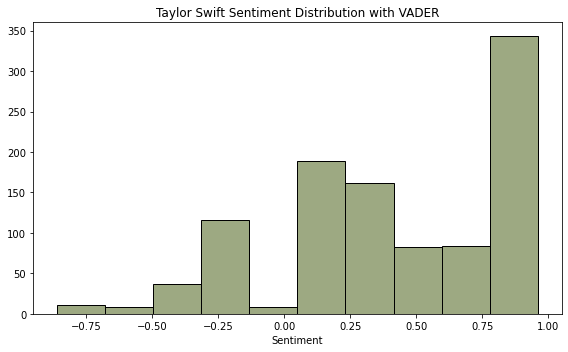

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(swift, x='compound', color="#7C8C58", bins=10)
plt.title("Taylor Swift Sentiment Distribution with VADER")
plt.xlabel("Sentiment")
plt.ylabel("")
plt.tight_layout()
plt.savefig("sentiment_swift_vader.png", dpi=300)

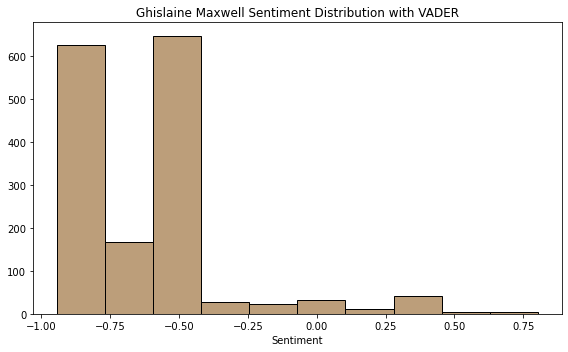

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(maxwell, x='compound', color="#A67E4E", bins=10)
plt.title("Ghislaine Maxwell Sentiment Distribution with VADER")
plt.xlabel("Sentiment")
plt.ylabel("")
plt.tight_layout()
plt.savefig("sentiment_maxwell_vader.png", dpi=300)

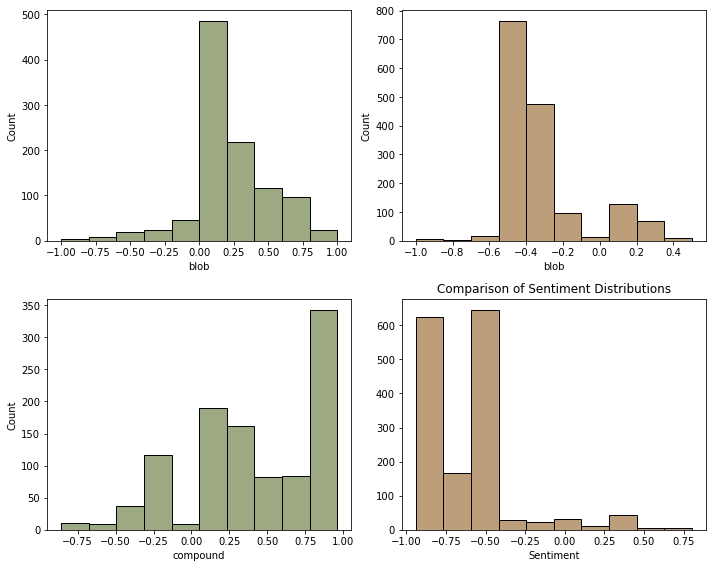

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=swift, x="blob", color="#7C8C58", bins=10, ax=axs[0, 0])
sns.histplot(data=maxwell, x="blob", color="#A67E4E", bins=10, ax=axs[0, 1])
sns.histplot(data=swift, x="compound", color="#7C8C58", bins=10, ax=axs[1, 0])
sns.histplot(data=maxwell, x="compound", color="#A67E4E", bins=10, ax=axs[1, 1])

plt.title("Comparison of Sentiment Distributions")
plt.xlabel("Sentiment")
plt.ylabel("")
plt.tight_layout()
plt.savefig("sentiment_all.png", dpi=300)